# Лабораторная работа Logistic map
## Normal level

Для работы будет использоваться Python с библиотеками numpy для вычислений и matplotlib для графического представления.

In [52]:
import numpy as np
import matplotlib.pyplot as plt

In [53]:
def logistic_map(x, r):
	"""
	Функция одномерного логистического отображения.
	x: x_n
	r: параметр
	возвращаемое значение: x_{n+1}
	"""
	return r * x * (1 - x)

### Исследование неподвижных точек отображения

Необходимо:
1. Найти все неподвижные точки логистического отображения
2. Определить такие значения $r$, при которых отображение имеет одну/несколько неподвижных точек
3. Определить максимальное количество неподвижных точек отображения

Неподвижная точка $x^*$ удовлетворяет: $$x^* = f(x^*)$$
Т.е. рассматриваем уравнение: $$x^* = rx^*(1-x^*)$$

Ищем все $x^*$ удовлетворяющие уравнению.\
(для простоты $x^*$ далее будет записываться как $x$)\
Перенесем $x$: $$rx(1 - x) - x = 0$$
Вынесем $x$: $$x(r(1 - x) - 1) = 0$$
Получили произведение двух множителей, равное нулю, следовательно
$$x = 0 \ \ \text{или} \ \  r(1-x) - 1 = 0$$
Решим второе уравнение:
$$r(1-x)-1=0\Rarr r(1-x)=1\Rarr 1-x = \frac{1}{r}\Rarr x = \frac{r-1}{r}$$
Рассмотрим 2 случая:
- Если $r = 0$: единственная неподвижная точка $x=0$
- Если $r \neq 0$: две неподвижные точки $x_1 = 0$ и $x_2 = \frac{r-1}{r}$

Из определения логистического отображения имеем:
$$r \in [0,4], \ \ 0 \le x_n \le 1,$$
т.е. нас интересует лишь неподвижные точки внутри этого отрезка.

1. Первая точка $x_1 = 0$ лежит в $[0,1], \ \forall r$
2. Рассмотрим вторую точку $x_2 = \frac{r-1}{r}$:\
Условие $x_2 \le 1$: $$\frac{r-1}{r}\le 1 \Rarr r-1 \le r \Rarr -1 \le 0,$$\
что всегда верно при $r > 0$, значит ограничение сверху не добавляет условий.\
Условие $x_2 \ge 0$: $$\frac{r-1}{r} \ge 0$$\
при $r > 0$ знак дроби будет определяться знаком числителя:\
Если $r-1 \ge 0 \iff r \ge 1$, то $x_2 \ge 0$\
Если $r-1 < 0 \iff r < 1$, то $x_2 < 0$

Таким образом,
- при $0<r<1$ вторая точка вне интервала $[0,1]$ (т.к. отрицательна)
- при $r = 1$ вторая точка совпадает с первой: $x_1 = x_2 = 0$
- при $1 < r \le 4$ вторая точка лежит в интервале $(0,1]$ 

**Выводы по кол-ву точек в зависимости от $r$**\
При $r=0$ одна неподвижная точка $x^* = 0$\
При $r \neq 0$ две неподвижные точки: $$x_1=0, \ x_2 = \frac{r-1}{r}$$\
Т.е. максимум 2 неподвижные точки, т.к. $f(x_n)$ - квадратичная функция, а уравнение неподвижной точки $x = f(x)$ сводится к квадратному, которое имеет не более двух корней

### Монотонность и предел логистической последовательности при $r \in (0,1]$

**Утверждение**
$$\forall r \in (0,1], \ \forall x_0 \in (0,1): \ \ \{x_n\} - \text{монотонно убывает}$$

**Доказательство**\
Рассмотрим отношение: $$\frac{x_{n+1}}{x_n} = \frac{rx_n(1-x_n)}{x_n} = r(1-x_n)$$
Из условия знаем, что $0 < x_0 < 1$, из этого следует $0 < x_n < 1$ при $r \in (0,1]$ (доказано в easy части л.р.)\
Получаем:
$$0 < (1-x_n) < 1$$

Т.к. из условия $r\in(0,1]$ имеем:
- $r(1-x_n) > 0$
- $r(1-x_n) < 1 \cdot 1 < 1, \ $ т.к. $(1-x_n) < 1$ 

Таким образом,
$$0 < r(1-x_n) < 1 \ \Rarr \ 0 < \frac{x_{n+1}}{x_n} < 1 \ \Rarr \ 0 < x_n+1 < x_n$$

Каждый следующий член последовательности строго меньше предыдущего, а значит $\{x_n\}$ - монотонно убывает и всюду положительна

**Существование предела**\
Последовательность $\{x_n\}$ монотонно убывает и положительна, снизу ограничена числом 0\
По теореме Вейерштрасса (о монотонной ограниченной последовательности) знаем, что последовательность имеет конечный предел

In [54]:
def sequence_iterate(x0, r, amount):
    """
    Функция генерации numpy массива из некоторых последовательных элементов {x_n}
    x0: первый элемент массива
    r: параметр
    amount: кол-во элементов
    возвращаемое значение: numpy.array
    """
    x_list = [x0]
    x_cur = x0
    for _ in range(amount):
        x_cur = logistic_map(x_cur, r)
        x_list.append(x_cur)
    return np.array(x_list)

In [55]:
r_vars = [0.3, 0.7, 0.9, 1]
x0 = 0.3
amount = 100

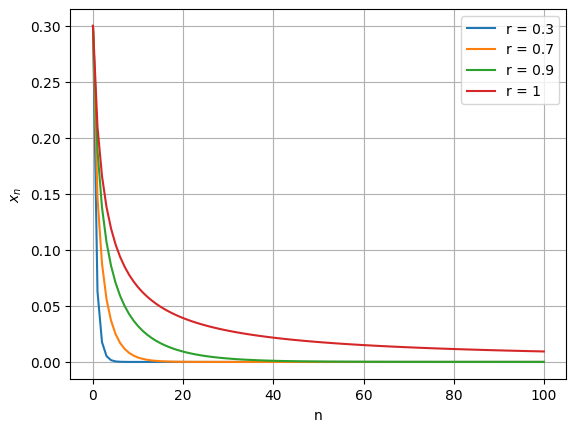

In [56]:
plt.figure()
for r in r_vars:
    xs = sequence_iterate(x0, r, amount)
    plt.plot(range(amount + 1), xs, label=f"r = {r}")
plt.xlabel("n")
plt.ylabel("$x_n$")
plt.grid(True)
plt.legend()
plt.show()

Из графика видим монотонное убывание последовательности и стремление к нулю.

### Исследование подпоследовательностей $\{x_{2n}\}$ и $\{x_{2n+1}\}$

Из условия дано:
$$r \in (2,3), \ \  x_{2n} > x^*, \ \ x_{2n+1} < x^*$$
Также известно:
$$x_ \in (0,1), \ \ r \in (1, 3]: \ \ \underset{n\rarr \infty}{\lim} x_n = x^*$$

Раннее было доказано, что при $r \neq 0$ мы имеем две неподвижные точки $x_1 = 0$ и $x_2 = \frac{r-1}{r}$\
Рассматривать будем только вторую (ненулевую, т.к. $x_{2n+1}$ не может быть отрицателен)

#### Исследование монотонности подпоследовательностей

**1. Введение отображений**\
Рассмотрим отображение $g(x) = f(f(x)),$ т.е. $x_{n+2} = g(x_n)$
Для исследования монотонности нас интересует только знак разности двух соседних элементов подпоследовательностей\
Введем еще одно отображение $h(x) = g(x) - x$
$$g(x) = f(f(x)), \ \ h(x) = g(x) - x$$

Заметим, что корни $h(x)$ соответствуют неподвижным точкам отображения $g(x)$ (когда $g(x) = x$ отображение $h(x)$ принимает значение 0), т.е. решениям уравнения $g(x) = x$

Вычислим и упростим:
$$h(x) = g(x) - x = r^2x(1-x)(1-rx(1-x)) - x$$
Умножим $x$ на $1-x$:
$$g(x) = r^2(x-x^2)(1-r(x-x^2)) = r^2(x-x^2) - r^3(x-x^2)^2 \Rarr$$
$$h(x) = g(x) - x = r^2(x-x^2) - r^3(x-x^2)^2 - x$$
Умножим $r^n$ на скобки:
$$h(x) = (r^2x - r^2x^2) - (r^3x^2 - 2r^3x^3 + r^3x^4) - x$$
Раскроим скобки:
$$h(x) = r^2x - r^2x^2 - r^3x^2 + 2r^3x^3 - r^3x^4 - x$$
Сгруппируем слагаемые:
$$h(x) = -r^3x^4 + 2r^3x^3 - (r^2 + r^3)x^2 + (r^2-1)x$$
Вынесем общий множитель $-x$:
$$h(x) = -x(r^3x^3 - 2r^3x^2 + (r^2 + r^3)x - (r^2 - 1))$$
Выделим кубический многочлен:
$$P(x) = r^3x^3 - 2r^3x^2 + (r^2 + r^3)x - (r^2 - 1)$$
$$h(x) = -xP(x)$$

Заметим, что $x=0$ - корень $h(x)$, соответствующий первой неподвижной точке\
Зная вторую неподвижную точку можем записать $h(\frac{r-1}{r})=0$, а из этого следует, что $x_2$ - корень $P(x)$\
Следовательно, $P(x)$ делится на $(x - x_2)$\
Найдем линейный множитель с тем же корнем:
$$x - x_2 = x - \frac{r-1}{r} = \frac{rx-(r-1)}{r}=\frac{rx-r+1}{r}$$
$$\text{линейный множитель} \sim (rx - r + 1)$$

Поделим $P(x)$ на множитель $rx-r+1$:
$$\frac{r^3 x^3}{rx - r + 1} - \frac{2r^3 x^2}{rx - r + 1} + \frac{r^3 x}{rx - r + 1} + \frac{r^2 x}{rx - r + 1} - \frac{r^2}{rx - r + 1} + \frac{1}{rx - r + 1}$$
Получим:
$$r^2x^2 - r^2x - rx + r + 1$$

Таким образом,
$$P(x) = (rx - r + 1)(r^2x^2 - r^2x - rx + r + 1) \Rarr$$
$$h(x) = g(x) - x = -x(rx - r + 1)(r^2x^2 - r^2x - rx + r + 1)$$

Рассмотрим каждый множитель:
1. $x$ дает корень $x=0$, что соответствует первой неподвижной точке
2. $rx - r + 1 = 0 \Rarr x = \frac{r-1}{r} = x_2$, что соответствует второй неподвижной точке
3. Квадратный множитель, решим относительно $x$. $$ r^2x^2 - r^2x - rx + r + 1 = 0 $$ $$ x_{3,4}=  \frac{r \pm \sqrt{r^2 - 2r - 3} + 1}{2r}$$ $$x_{3,4}=  \frac{r \pm \sqrt{(r-3)(r+1)} + 1}{2r}$$\
При $r \in (2,3)$ имеем $r + 1 > 0, \ r - 3 < 0$, следовательно подкоренное выражение отрицательно, уравнение не имеет действительных корней.

В итоге, для $r \in (2,3)$ все действительные корни уравнения $g(x) = x$ - это $$x_1 = 0, \ x_2 = \frac{r-1}{r}$$

**2. Исследование разности элементов подпоследовательности на интервалах $(0, x_2)$ и $(x_2, 1)$**\
Исследуем знак $g(x) - x$ на интервалах $(0, x_2)$ и $(x_2, 1)$.\
Т.к. $g(x) - x$ непрерывна, а ее корни на интервале $(0,1)$ только 0 и $x_2$, знак на интервалах $(0, x_2)$ и $(x_2, 1)$ неизменен.\
Чтобы найти знак на конкретном интервале достаточно будет исследовать одну точку интервала.

1. Интервал $0 < x < x_2$:\
Пусть $x_0 = \frac{x_2}{2} = \frac{r-1}{2r}$\
Подставим $x_0$ в $h(x)$: $$h(x_0) = -\frac{(r-1)^2(r^2-2r-7)}{16r}$$\
$(r-1)^2 > 0,$\
$r^2 - 2r - 7 < 0,$ (оценил при границах интервала $(2,3)$)\
$16r > 0$\
Значит $h(x_0) > 0 \Rarr g(x_0) - x_0 > 0 \Rarr g(x_0) > x_0$

2. Интервал $x_2 < x < 1:\
Пусть $x_0 = \frac{x_2+1}{2}$\
Подставим $x_0$ в $h(x)$: $$h(x_0) = \frac{(2r-7)(2r-1)}{16r}$$\
$2r-1 > 0,$\
$2r - 7 < 0,$\
$16r > 0$\
Значит $h(x_0) < 0 \Rarr g(x_0) - x_0 < 0 \Rarr g(x_0) < x_0$

В итоге, $$\forall x \in (0, x_2): \ \ g(x) > x \ \text{и} \ \forall x \in (x_2, 1): \ \ g(x) < x$$

**3. Монотонность подпоследовательностей**\
Четная подпоследовательность:\
Т.к. $x_{2n} \in (x_2, 1)$, то из предыдущего пункта получаем: $$g(x_{2n} < x_{2n})$$
Следовательно, $$x_{2(n+1)} < x_{2n}, \ \text{т.к.} \ g(x_{2n}) = x_{2n+2}$$
**Четная последовательность строго убывает**

Нечетная подпоследовательность:\
Т.к. $x_{2n+1} \in (0, x_2)$, то из предыдущего пункта получаем: $$g(x_{2n+1} > x_{2n+1})$$
Следовательно, $$x_{2(n+1)+1} > x_{2n+1}, \ \text{т.к.} \ g(x_{2n+1}) = x_{2n+3}$$
**Нечетная последовательность строго возрастает**


In [57]:
r = 2.7
x0 = 0.7 
x = sequence_iterate(x0, r, 50)
x_even = x[::2]
x_odd  = x[1::2]
x_fixed = (2.7 - 1) / 2.7

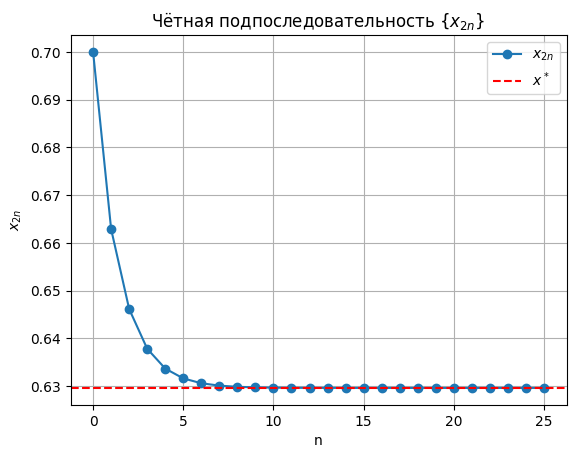

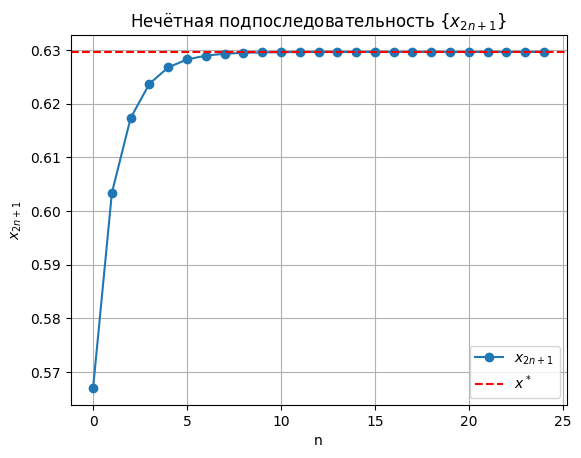

In [58]:
plt.figure()
plt.plot(range(len(x_even)), x_even, marker='o', label='$x_{2n}$')
plt.axhline(x_fixed, linestyle='--', color='red', label='$x^*$')
plt.xlabel('n')
plt.ylabel('$x_{2n}$')
plt.title('Чётная подпоследовательность $\\{x_{2n}\\}$')
plt.grid(True)
plt.legend()
plt.show()

plt.figure()
plt.plot(range(len(x_odd)), x_odd, marker='o', label='$x_{2n+1}$')
plt.axhline(x_fixed, linestyle='--', color='red', label='$x^*$')
plt.xlabel('n')
plt.ylabel('$x_{2n+1}$')
plt.title('Нечётная подпоследовательность $\\{x_{2n+1}\\}$')
plt.grid(True)
plt.legend()
plt.show()

По графикам видим:
- Четная подпоследовательность строго убывает, значения выше неподнижной точки $x_2$
- Неетная подпоследовательность строго возрастает, значения ниже неподнижной точки $x_2$

### Исследование неподвижных точек и монотонности $g(x_n)$

Отображение $g(x_n)$ задано вариантом ($N = 465208 \bmod 5 = 3$):
$$g(x_{n+1}) = rx_n(1-x_n)(3-x_n), \ \ r \in [0; \frac{27}{2(7\sqrt{7}-10)}]$$

Необходимо:
1. Найти неподвижную точку
2. Найти или оценить диапазон параметра $r$, при котором последовательность $\{g_n\}$ стремится к нулю
3. Построить графики для разных $r$

**Поиск неподвижной точки**

Для неподвижной точки $x^*$ выполняется:
$$x^*=g(x^*)=rx^*(1-x^*)(3-x^*)$$

Рассматриваем уравнение:
$$x = rx(1-x)(3-x)$$

Замечаем очевидный корень $x=0$.\
Пусть $x \neq 0$. Разделим на $x$:
$$1 = r(1-x)(3-x) \Rarr$$
$$1 = r(3 - 4x + x^2) \Rarr$$
$$x^2 - 4x + 3 = \frac{1}{r} \Rarr$$
$$x^2 - 4x + 3 - \frac{1}{r} = 0$$

Решаем квадратное уравнение:
$$x = \frac{4\pm \sqrt{16 - 4(3-\frac{1}{r})}}{2} = \frac{4\pm \sqrt{4 + \frac{4}{r}}}{2} = 2 \pm \sqrt{1 + \frac{1}{r}}$$

Получили еще две неподвижные точки, однако мы рассматриваем только отрезки $x \in [0,1]$:
1. Для любого $r > 0$ имеем $\sqrt{1 + \frac{1}{r}} > 1$. Вторая точка вне интервала
2. Третья точка может быть как меньше нуля, так и в нашем интервале. $$2 - \sqrt{1 + \frac{1}{r}} > 0 \Rarr \sqrt{1 + \frac{1}{r}} < 2 \Rarr 1 + \frac{1}{r} < 4 \Rarr r > \frac{1}{3} $$

В итоге,
- При $0 < r < \frac{1}{3}$ есть единственная точка $x^* = 0$
- При $\frac{1}{3} < r \le \frac{27}{2(7\sqrt{7}-10)}$ есть две неподвижные точки: $$x_1 = 0, \ \ x_2 = 2 - \sqrt{1 + \frac{1}{r}}$$


**Поиск диапазона значений $r$ при котором $\{x_n\} \rarr 0$**

Для монотонного убывания последовательности достаточно доказать $0 < g(x) < x$ для всех $x \in (0,1)$.\
Для $r>0$ имеем: $x > 0, \ 1 - x > 0, \ 3 - x > 0$\
Следовательно $g(x) = rx(1-x)(3-x) > 0$

Докажем:
$$g(x) < x, \ \ \forall x \in (0,1) $$

Рассматриваем неравенство:
$$rx(1-x)(3-x)<x, \ \ \forall x \in (0,1) $$
Т.к. $x>0$ можем поделить:
$$r(1-x)(3-x)<1$$
Рассмотрим функцию:
$$\phi(x)=(1-x)(3-x)=3-4x+x^2$$
На отрезке $[0,1]$ изучим производную:
$$\phi'(x) = 2x - 4$$
$$2x - 4 < 0, \ \ \text{т.к.} \ \ x \le 1 \Rarr x < 2 \Rarr 2x < 4$$
$$\phi'(x) < 0$$
Т.е. $\phi$ строго убывает на отрезке, а значит максимум достигается в точке 0:
$$\underset{x\in [0,1]}{\max}\phi(x)=\phi(0)=(1-0)(3-0)=3$$
Следовательно:
$$\phi(x) = (1-x)(3-x) \le 3 \Rarr$$
$$r(1-x)(3-x) \le 3r \Rarr$$
$$g(x) \le 3r$$
Помним, что убывание последовательности показывает неравенство $g(x) < 1$, значит справедливо потребовать:
$$3r\le 1 \Rarr$$
$$r \le \frac{1}{3}$$
Таким образом, при $0 < r \le \frac{1}{3}$ получаем:
$$r(1-x)(3-x) \le 1 \ \Rarr \ 0 < g(x) \le x, \ \ \ \forall x \in [0,1]$$
Т.е. на установленном полуинтервале $g(x)$ **убывает и ограничена снизу нулем**.\
Для строгой монотонности достаточно взять интервал вместо полуинтервала.

По теореме Вейерштрасса (о монотонной ограниченной последовательности) существует конечный предел:
$$\underset{n\rarr \infty}{\lim}x_n = L \ge 0$$
Отображение $g$ непрерывно, а значит справедливо заметить:
$$L = \underset{n\rarr \infty}{\lim} x_{n+1} = \underset{n\rarr \infty}{\lim}g(x_n)=g(\underset{n\rarr \infty}{\lim} x_n) = g(L)$$
Т.е. предельная точка $L$ является неподвижной точкой отображения на отрезке $[0,1]$.\
При $0 < r \le \frac{1}{3}$ единственная неподвижная точка $x_* = 0$, следовательно:
$$L = x^* = 0 \iff \underset{n\rarr \infty}{\lim} x_n = 0$$



In [59]:
def g_map(x, r):
	"""
	Функция перехода g_{n+1}
	x: x_n
	r: параметр
	возвращаемое значение: x_{n+1}
	"""
	return r * x * (1 - x) * (3 - x)

In [60]:
def g_sequence_iterate(x0, r, amount):
    """
    Функция генерации numpy массива из некоторых последовательных элементов {x_n}
    x0: первый элемент массива
    r: параметр
    amount: кол-во элементов
    возвращаемое значение: numpy.array
    """
    x_list = [x0]
    x_cur = x0
    for _ in range(amount):
        x_cur = logistic_map(x_cur, r)
        x_list.append(x_cur)
    return np.array(x_list)

In [89]:
x0 = 0.5
amount = 100
r_vars = [.1, 1/3, .9, 1.2]

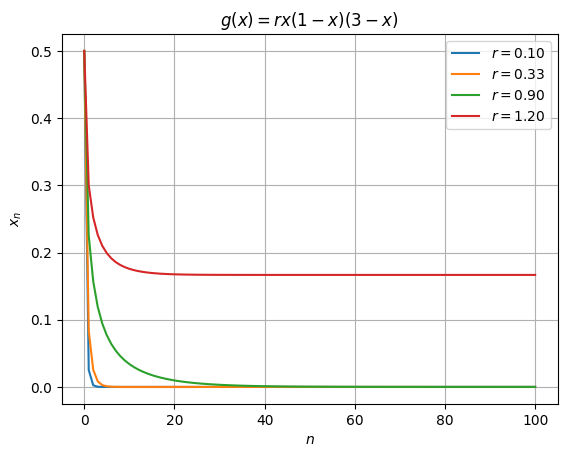

In [90]:
plt.figure()
for r in r_vars:
    xs = g_sequence_iterate(x0, r, amount)
    plt.plot(range(amount+1), xs, label=fr"$r={r:.2f}$")
plt.xlabel('$n$')
plt.ylabel('$x_n$')
plt.title('$g(x)=r x(1-x)(3-x)$')
plt.grid(True)
plt.legend()
plt.show()

На графике видим, что последовательность на установленном нами интервале $(0, \frac{1}{3}]$ стремится к нулю.